# K-means clustering

### This file contains an implementation of the KMeans algorithm with the ability to run the algorithm a given number of times and print the best results with a graph of the SSEs for each iteration.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [2]:
def KMeans(data, k, nRuns):  
    """Function to perform kmeans clustering.
    
    Args:
        - data: numpy array with only feature data
        - k: number of clusters to perform clustering
        - nRuns: number of runs to use for the algorithm
    
    Returns:
        - KMeansResult object with the results of the clustering
    
    """
    bestRun = KMeansResult()
    for ii in range(nRuns):
        currentRun = KMeansSingleRun(data, k)
        if currentRun.bestSSE < bestRun.bestSSE:
            bestRun = currentRun
    return bestRun

In [3]:
def KMeansSingleRun(data, k):
    """Performs a single run of the k-means algorithm.
    
    Args:
        data: numpy array with feature data only
        k: number of clusters to perform clustering
        
    Returns:
        KMeansResult object with the output of the run
        
    """
    means = initializeRandomSamples(data, k)
    labels = np.full((len(data), 1), -1)
    convergenceChecker = ConvergenceChecker(k)
    SSEs = []
    while not convergenceChecker.isConverged(means):
        labels = assignMeans(data, means)
        means = calculateMeans(data, labels, k)
        SSEs.append(calculateSSE(data, means, labels))
    return KMeansResult(means, labels, SSEs)

In [4]:
def initializeRandomSamples(data, k):
    """Selects k random samples from the data.
    
    Args:
        data: numpy array where samples will be selected from
        k: number of samples to select from the data
        
    Returns:
        numpy array containing k random samples
        
    """
    sampleIndicies = [random.randint(0, len(data) - 1) for k in range(k)]
    samples = data[sampleIndicies, :]
    return samples

In [5]:
def assignMeans(data, means):
    """Assign each datapoint to the closest mean.
    
    Args:
        data: numpy array with data to assign
        means: array of means to use for assignment
        
    Returns:
        The labels for each datapoint
        
    """
    labels = np.zeros(len(data), dtype=int)
    for index, datapoint in enumerate(data):
        labels[index] = closestMean(datapoint, means)
    return labels

In [6]:
def closestMean(datapoint, means):
    """Function to calculate the closest mean for a given datapoint. Works by creating an array of distances
    and returning the index of the smallest distance.
    
    Args:
        datapoint: numpy array to assign
        means: numpy array to use for assignment
        
    Returns:
        label for the closest mean to the datapoint
        
    """
    distances = np.full(len(means), np.inf)
    for meanIndex, mean in enumerate(means):
        distances[meanIndex] = calculateSquaredDistance(datapoint, mean)
    return np.argmin(distances)

In [7]:
def calculateSquaredDistance(data1, data2):
    """Function to calculate squared distance between two pieces of data. Can be used for arrays with the same shape,
    single datapoints, or with an array of datapoints and a single datapoint.
   
   Args:
        data1: numpy array
        data2: numpy array
        
    """
    return np.sum(np.power((data1 - data2), 2))

In [8]:
def calculateMeans(data, labels, k):
    """Calculates the new means of the model given the data and labels.
    
    Args:
        data: numpy array
        labels: the cluster that each point belongs to
        k: number of clusters in the model
        
    Returns:
        New means for clusters given the labels
        
    """
    means = np.zeros((k, np.size(data, 1)))
    for label in set(labels):
        dataForLabel = data[np.where(labels == label), :]
        means[label] = np.apply_along_axis(np.mean, 1, dataForLabel)
    return means

In [9]:
def calculateSSE(data, means, labels):
    """Function to calculate the SSE for the current state of the model.
    
    Args:
        data: numpy array containing datapoints
        means: numpy array containing means
        labels: which cluster each datapoint belongs to
        
    Returns:
        Sum of squared errors
        
    """
    SSE = 0
    for label in set(labels):
        dataInCluster = data[np.where(labels == label), :]
        SSE += calculateSquaredDistance(dataInCluster, means[label])
    return SSE

## Classes

In [10]:
class KMeansResult:
    """Class to store parameters of a kmeans runs, contains centers, SSEs, and bestSSE. 
    
    Attributes:
        centers: converged centers of the kmeans algorithm.
        SSEs: the SSEs for each iteration of the algorithm
        bestSSE: The final converged SSE value
        
    """
    def __init__(self, centers=[], labels=[], SSEs=[]):
        self.centers = centers
        self.labels = labels
        self.SSEs = SSEs
        self.bestSSE = SSEs[-1] if len(SSEs) > 0 else np.inf

In [11]:
class ConvergenceChecker:
    """Class to check convergence of KMeans algorithm.
    
    Attributes:
        oldMeans: The means from the previous iteration.

    """
    def __init__(self, k):
        """Initialize oldMeans to values of infinity so that first call doesn't return true
        
        Args:
            k: number of clusters
            
        """
        self.oldMeans = np.full(k, np.inf)
    
    def isConverged(self, currentMeans):
        """Compares currentMeans to last iteration means and checks if they are equal
        
        Args:
            currentMeans: means to compare against old means
        
        """
        converged = np.array_equal(self.oldMeans, currentMeans)
        if not converged:
            self.oldMeans = currentMeans
        return converged

In [12]:
class KMeansData:
    """Class to read and store data to be used in KMeans. It parses out and stores features and labels.
    
    Attributes:
        data: Just feature data
        labels: Just label data
        
    """
    def __init__(self, filename, hasLabels = True):
        data = np.loadtxt(filename, dtype='float', delimiter=',')
        if hasLabels:
            self.data = data[:, :-1]
            self.labels = data[:, -1]
        else:
            self.data = data

## Printing Functions

In [13]:
def plotResults(data, labels, centers, dimx=0, dimy=1):
    """Function to print the labeled data and centers on a scatter plot. It will use default dimensions 0 and 1.
    
    Args:
        data: numpy array to be plotted
        labels: numpy array to use for coloring
        centers: numpy array that will be plotted as large red stars on the graph
    
    """
    plt.scatter(x=data[:, dimx], y=data[:, dimy], c=labels)
    plt.scatter(x=centers[:, dimx], y=centers[:, dimy], c='red', marker='*', s=100)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()

In [14]:
def plotSSEs(SSEs, data):
    """Function to plot SSEs collected over each iteration.
    
    Args:
        SSEs: numpy array to be plotted
        
    """
    normalizedSSEs = np.array(SSEs) / len(data)
    plt.plot(range(len(normalizedSSEs)), normalizedSSEs)
    plt.xlabel('Iteration')
    plt.ylabel('SSE/N')
    plt.show()

## Execution:
    - gauss2
    - gauss3
    - iris
    - geyser

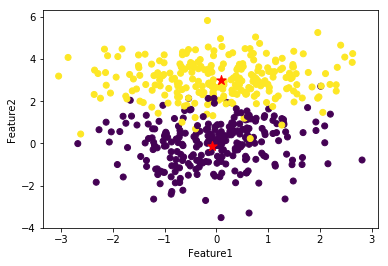

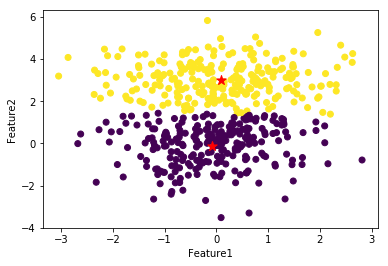

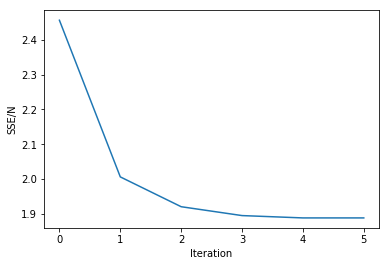

Centers
[[-0.08675988 -0.11083675]
 [ 0.08801968  3.01177709]]


In [15]:
gauss2 = KMeansData("gauss2.txt")
gauss2Result = KMeans(gauss2.data, 2, 10)
plotResults(gauss2.data, gauss2.labels, gauss2Result.centers)
plotResults(gauss2.data, gauss2Result.labels, gauss2Result.centers)
plotSSEs(gauss2Result.SSEs, gauss2.data)
print('Centers')
print(gauss2Result.centers)

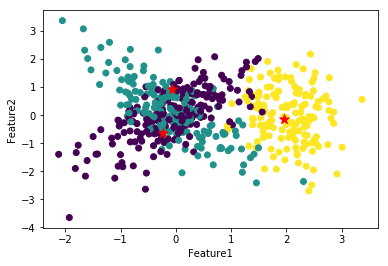

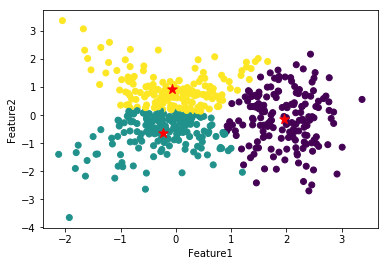

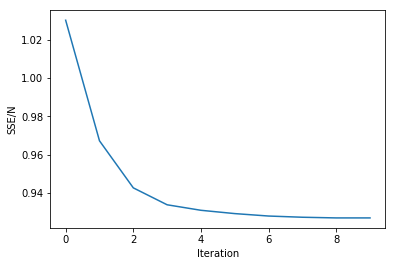

Centers
[[ 1.95212232 -0.14025082]
 [-0.23262339 -0.63310802]
 [-0.06549453  0.93088949]]


In [16]:
gauss3 = KMeansData("gauss3.txt")
gauss3Result = KMeans(gauss3.data, 3, 10)
plotResults(gauss3.data, gauss3.labels, gauss3Result.centers)
plotResults(gauss3.data, gauss3Result.labels, gauss3Result.centers)
plotSSEs(gauss3Result.SSEs, gauss3.data)
print('Centers')
print(gauss3Result.centers)

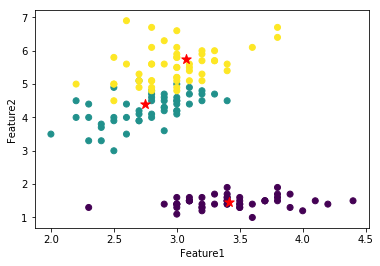

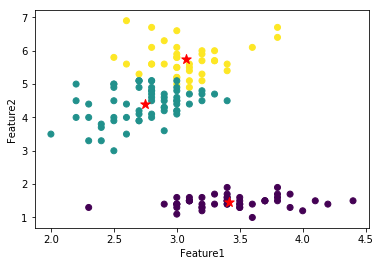

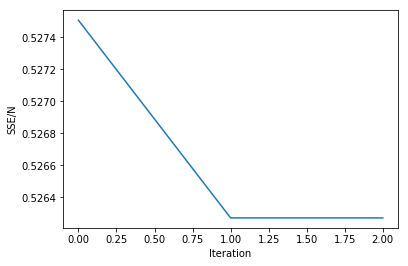

Centers
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [17]:
iris = KMeansData("iris.txt")
irisResult = KMeans(iris.data, 3, 10)
plotResults(iris.data, iris.labels, irisResult.centers, 1, 2)
plotResults(iris.data, irisResult.labels, irisResult.centers, 1, 2)
plotSSEs(irisResult.SSEs, iris.data)
print('Centers')
print(irisResult.centers)

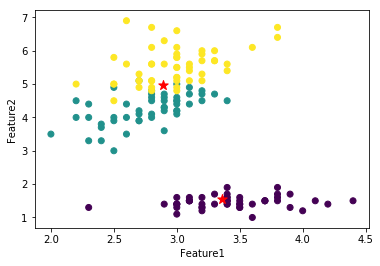

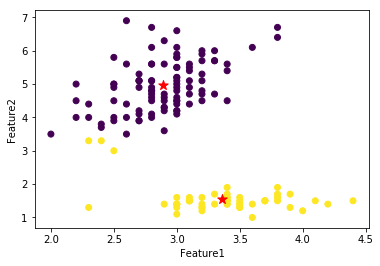

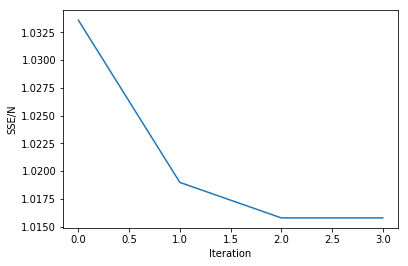

Centers
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]


In [18]:
iris = KMeansData("iris.txt")
irisResult = KMeans(iris.data, 2, 10)
plotResults(iris.data, iris.labels, irisResult.centers, 1, 2)
plotResults(iris.data, irisResult.labels, irisResult.centers, 1, 2)
plotSSEs(irisResult.SSEs, iris.data)
print('Centers')
print(irisResult.centers)

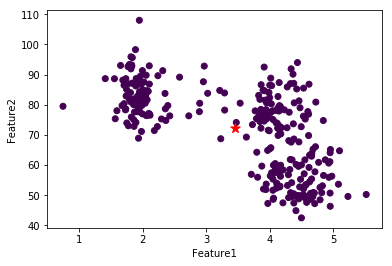

In [19]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 1, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)

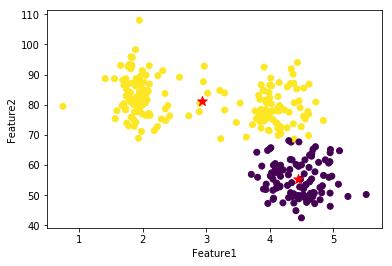

In [20]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 2, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)

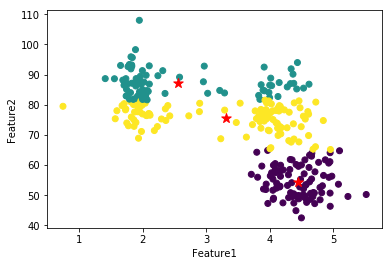

In [21]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 3, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)

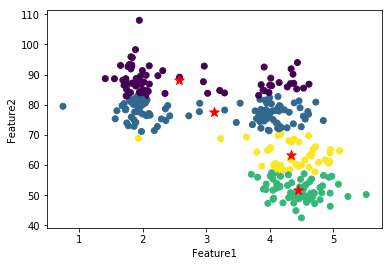

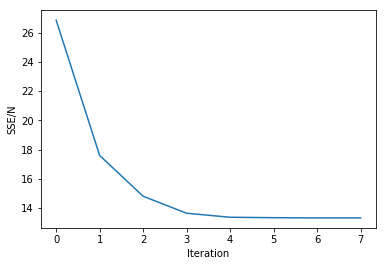

Centers
[[ 2.57160168 88.14281552]
 [ 3.11959391 77.45233941]
 [ 4.44694838 51.72569778]
 [ 4.33075333 63.47027391]]


In [22]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 4, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)
plotSSEs(geyserResult.SSEs, geyser.data)
print('Centers')
print(geyserResult.centers)

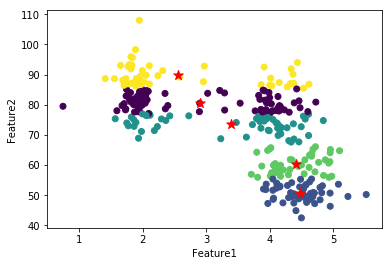

In [23]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 5, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)

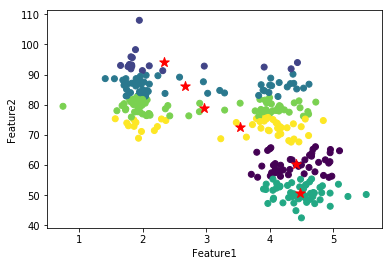

In [24]:
geyser = KMeansData("geyser.txt", False)
geyserResult = KMeans(geyser.data, 6, 10)
plotResults(geyser.data, geyserResult.labels, geyserResult.centers)